## The normal equation

In [130]:
# Random linear dataset
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [131]:
# The normal equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06356426],
       [2.94109446]])

In [132]:
# Some predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06356426],
       [9.94575319]])

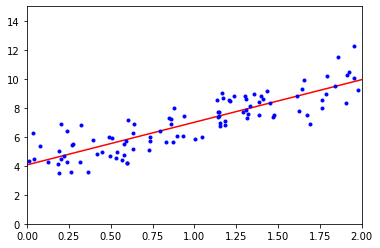

In [133]:
import matplotlib.pyplot as plt 
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.plot(X, y, "b.")

In [134]:
# Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.06356426]), array([[2.94109446]]))

In [135]:
lin_reg.predict(X_new)

array([[4.06356426],
       [9.94575319]])

In [136]:
## Polynomial regression
# Some random data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

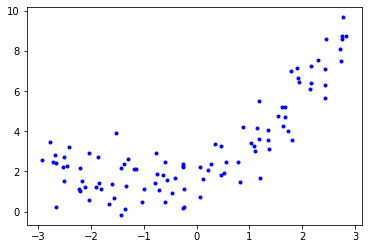

In [137]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")

In [138]:
# 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.78849236])

In [140]:
# Fit linear regression with the original features and the 2nd degree polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.84418499]), array([[1.06695854, 0.48046684]]))

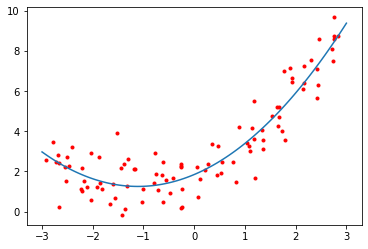

In [258]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
predictions = lin_reg.predict(X_new_poly)

plt.plot(X,y,"r.")
plt.plot(X_new, predictions, "-")
